In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
digits.data[0].reshape(8,8)

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [8]:
kmeans.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [10]:
clusters = kmeans.predict(digits.data)

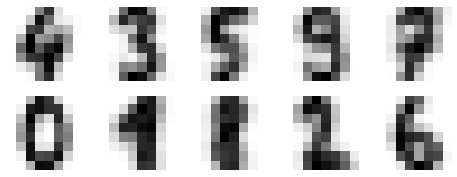

In [14]:

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [16]:
kmeans.predict(digits.data[[0]])

array([5])

In [17]:
digits.data[0].reshape(8,8)

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [18]:
predict = kmeans.predict(digits.data)

In [25]:
digits.data[predict == 7].shape

(224, 64)

In [26]:
import pandas as pd

In [30]:
df = pd.DataFrame(predict,columns=['cluster'])

In [42]:
d = df.groupby('cluster')

In [50]:
import numpy as np
np.where(predict == 7)

(array([   1,    2,   18,   28,   38,   40,   50,   51,   53,   57,   69,
          76,   93,   95,   96,   99,  114,  115,  116,  122,  123,  127,
         129,  138,  148,  158,  168,  170,  183,  198,  206,  224,  238,
         242,  248,  249,  253,  255,  257,  267,  274,  277,  284,  294,
         296,  298,  303,  326,  336,  341,  346,  349,  352,  355,  363,
         383,  404,  462,  492,  502,  508,  509,  524,  534,  544,  547,
         554,  556,  592,  612,  615,  630,  639,  643,  645,  647,  657,
         664,  667,  684,  688,  693,  699,  700,  702,  716,  726,  731,
         736,  739,  742,  745,  753,  760,  769,  775,  777,  787,  797,
         804,  818,  823,  846,  852,  856,  861,  866,  869,  875,  883,
         903,  905, 1030, 1040, 1047, 1050, 1069, 1071, 1076, 1080, 1083,
        1097, 1107, 1112, 1117, 1120, 1123, 1126, 1134, 1141, 1154, 1156,
        1175, 1178, 1185, 1199, 1204, 1213, 1227, 1237, 1242, 1247, 1250,
        1253, 1256, 1279, 1280, 1284, 

In [51]:
digits.target[1286]

8

In [52]:
from sklearn.metrics import accuracy_score

In [54]:
from scipy.stats import mode

In [55]:
labels = np.zeros_like(predict)

In [56]:
for i in range(10):
    mask = (predict == i)
    labels[mask] = mode(digits.target[mask][0])

C:\Users\ZekeLabs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
labels

array([0, 1, 1, ..., 1, 5, 1])

In [58]:
predict == 0

array([False, False, False, ..., False, False, False], dtype=bool)

In [60]:
accuracy_score(digits.target, labels)

0.42737896494156929

### k-means for color compression

In [61]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

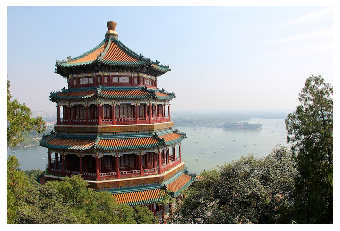

In [62]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [63]:
china.shape

(427, 640, 3)

In [66]:
data = china/255.0

In [68]:
data = data.reshape(427*640,3)

In [69]:
data.shape

(273280, 3)

In [70]:
img_kmeans = KMeans(n_clusters=16, random_state=0)

In [72]:
img_kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [74]:
new_colors = img_kmeans.cluster_centers_[img_kmeans.predict(data)]

In [75]:
china_recolored = new_colors.reshape(china.shape)

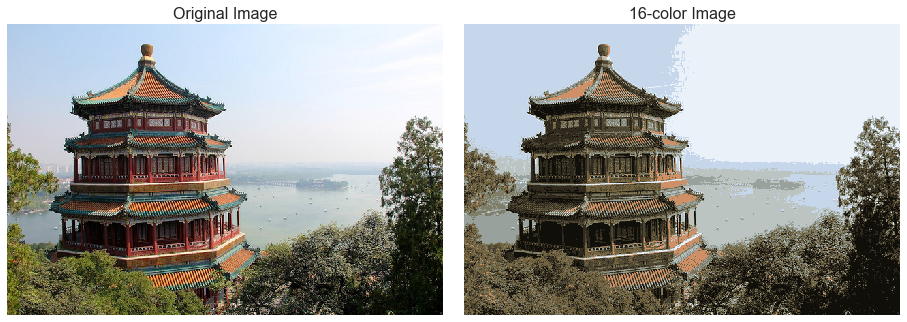

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);